 Leaf Color (RGB): R=0, G=0, B=0
 Health Status: Unhealthy


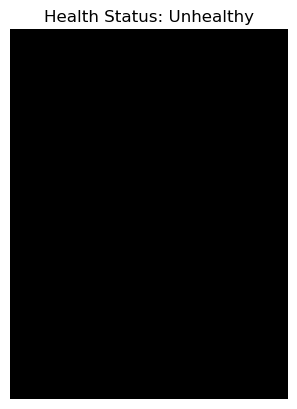

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Images/20250308_am.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#green Range
lower_green = np.array([25, 40, 40])
upper_green = np.array([90, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

# Clean the mask
kernel = np.ones((5, 5), np.uint8)
clean_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
clean_mask = cv2.morphologyEx(clean_mask, cv2.MORPH_CLOSE, kernel)

# Mean color of detected green region
mean_color = cv2.mean(img_rgb, mask=clean_mask)
r, g, b = mean_color[:3]

if g > r and g > b and g > 100:
    color_health = "Healthy"
elif g > r and g > b:
    color_health = "Slightly Pale"
else:
    color_health = "Unhealthy"

# Display result
print(f" Leaf Color (RGB): R={int(r)}, G={int(g)}, B={int(b)}")
print(f" Health Status: {color_health}")

#showing seperated image
highlighted = cv2.bitwise_and(img_rgb, img_rgb, mask=clean_mask)
plt.imshow(highlighted)
plt.title(f"Health Status: {color_health}")
plt.axis('off')
plt.show()